# Data Loading

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

import os
# from google.colab import drive
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

/home/arpit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# Run this when you want to use Google Drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/UCIHARDataset/UCIHARDataset'

Mounted at /content/drive


In [2]:

# Run this when you want to use ML FLow
dataset_path = '/home/arpit/UCIHARDataset/UCIHARDataset'

In [3]:
def load_har_dataset(base_path=dataset_path):
    """
    Load UCI HAR Dataset into pandas DataFrames
    """

    activity_labels = pd.read_csv(
        os.path.join(base_path, 'activity_labels.txt'),
        sep=' ',
        header=None,
        names=['activity_id', 'activity_name']
    )


    features = pd.read_csv(
        os.path.join(base_path, 'features.txt'),
        sep=' ',
        header=None,
        names=['feature_id', 'feature_name']
    )

    print(f"Activity Labels:\n{activity_labels}\n")
    print(f"Number of features: {len(features)}\n")


    print("Loading Training Data...")
    train_data = load_signals(base_path, 'train')

    print("Loading Test Data...")
    test_data = load_signals(base_path, 'test')

    return train_data, test_data, activity_labels, features


def load_signals(base_path, data_type='train'):
    signals_path = os.path.join(base_path, data_type, 'Inertial Signals')
    signal_types = [
        'body_acc_x', 'body_acc_y', 'body_acc_z',
        'body_gyro_x', 'body_gyro_y', 'body_gyro_z',
        'total_acc_x', 'total_acc_y', 'total_acc_z'
    ]

    signals_data = {}
    for signal in signal_types:
        filename = os.path.join(signals_path, f'{signal}_{data_type}.txt')
        signals_data[signal] = pd.read_csv(filename, sep=r'\s+', header=None)

    labels = pd.read_csv(os.path.join(base_path, data_type, f'y_{data_type}.txt'), header=None, names=['activity_id'])
    subjects = pd.read_csv(os.path.join(base_path, data_type, f'subject_{data_type}.txt'), header=None, names=['subject_id'])

    signal_columns = []
    for signal_name, df in signals_data.items():
        signal_columns.extend([f"{signal_name}_{i+1}" for i in range(df.shape[1])])
    signals_concat = pd.concat(signals_data.values(), axis=1)
    signals_concat.columns = signal_columns

    merged_df = pd.concat([subjects, labels, signals_concat], axis=1)
    return merged_df



train_data, test_data, activity_labels, features = load_har_dataset()

Activity Labels:
   activity_id       activity_name
0            1             WALKING
1            2    WALKING_UPSTAIRS
2            3  WALKING_DOWNSTAIRS
3            4             SITTING
4            5            STANDING
5            6              LAYING

Number of features: 561

Loading Training Data...
Loading Test Data...


In [4]:
train_data.head(5)

,subject_id,activity_id,body_acc_x_1,body_acc_x_2,body_acc_x_3,body_acc_x_4,body_acc_x_5,body_acc_x_6,body_acc_x_7,body_acc_x_8,...,total_acc_z_119,total_acc_z_120,total_acc_z_121,total_acc_z_122,total_acc_z_123,total_acc_z_124,total_acc_z_125,total_acc_z_126,total_acc_z_127,total_acc_z_128
0,1,5,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,...,0.100058,0.098564,0.093177,0.088742,0.090505,0.094843,0.098350,0.100385,0.099874,0.094987
1,1,5,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,...,0.094537,0.098759,0.101977,0.095360,0.089466,0.095126,0.099496,0.093535,0.089035,0.090612
2,1,5,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,...,0.085343,0.087155,0.084546,0.082166,0.081972,0.081413,0.081936,0.083011,0.082334,0.081487
3,1,5,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,...,0.088112,0.087322,0.083738,0.082701,0.084490,0.082785,0.084084,0.085761,0.083275,0.081404
4,1,5,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,...,0.088028,0.090312,0.088713,0.086957,0.086522,0.081640,0.079652,0.081329,0.085397,0.088816


In [5]:
print(f"Rows x Column of the train Data is {train_data.shape}")
print(f"Rows x Column of the test Data is {test_data.shape}")

Rows x Column of the train Data is (7352, 1154)
Rows x Column of the test Data is (2947, 1154)


In [6]:
# Available activities
activity_labels.head(6)

,activity_id,activity_name
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


# Data Visualisation

In [7]:
import seaborn as sns

### Check Label Distribution


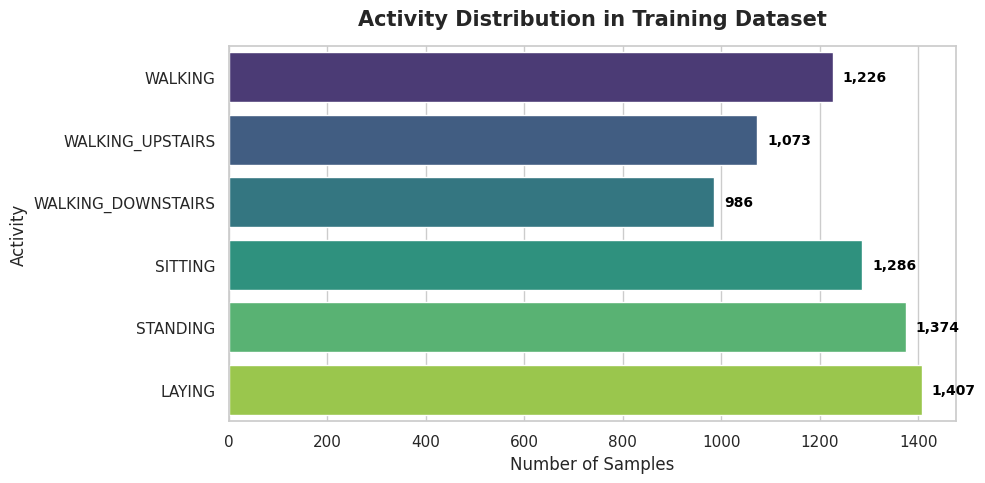

In [8]:
sns.set_theme(style="whitegrid", palette="Set2")
activity_counts = train_data['activity_id'].value_counts().sort_index()
activity_map = dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))
activity_names = [activity_map[i] for i in activity_counts.index]

plt.figure(figsize=(10, 5))

bar_colors = sns.color_palette("viridis", len(activity_counts))
bars = sns.barplot(
    y=activity_names,
    x=activity_counts.values,
    palette=bar_colors,
    hue = activity_names,
    legend = False
)
for i, (count, name) in enumerate(zip(activity_counts.values, activity_names)):
    plt.text(count + 20, i, f"{count:,}", va='center', fontsize=10, color='black', fontweight='bold')

plt.title("Activity Distribution in Training Dataset", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Number of Samples", fontsize=12)
plt.ylabel("Activity", fontsize=12)

plt.tight_layout()
plt.show()


### Activities per Subject

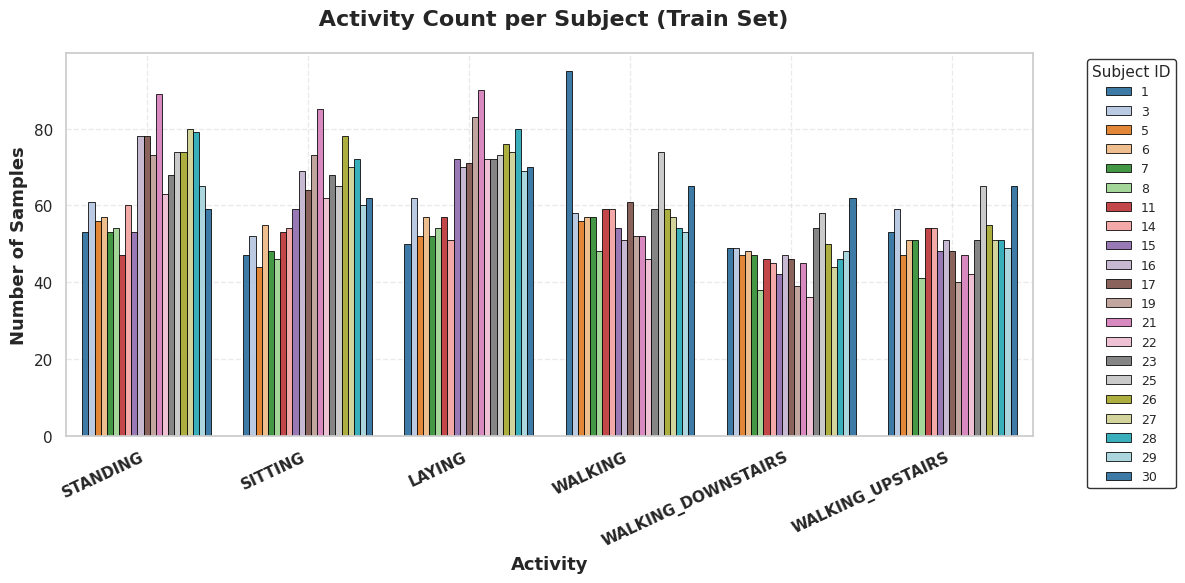

In [9]:
activity_map = dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))
if 'Activity' not in train_data.columns:
    train_data['Activity'] = train_data['activity_id'].map(activity_map)

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.countplot(
    data=train_data,
    x='Activity',
    hue='subject_id',
    palette='tab20',
    edgecolor='black',
    linewidth=0.6,
    alpha=0.95
)

plt.title(" Activity Count per Subject (Train Set)", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=25, ha='right', fontsize=11, fontweight='bold')
plt.xlabel("Activity", fontsize=13, fontweight='bold')
plt.ylabel("Number of Samples", fontsize=13, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(
    title="Subject ID",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=11,
    frameon=True,
    edgecolor='black'
)
plt.tight_layout()
plt.show()



### HeatMap Showing Correlation

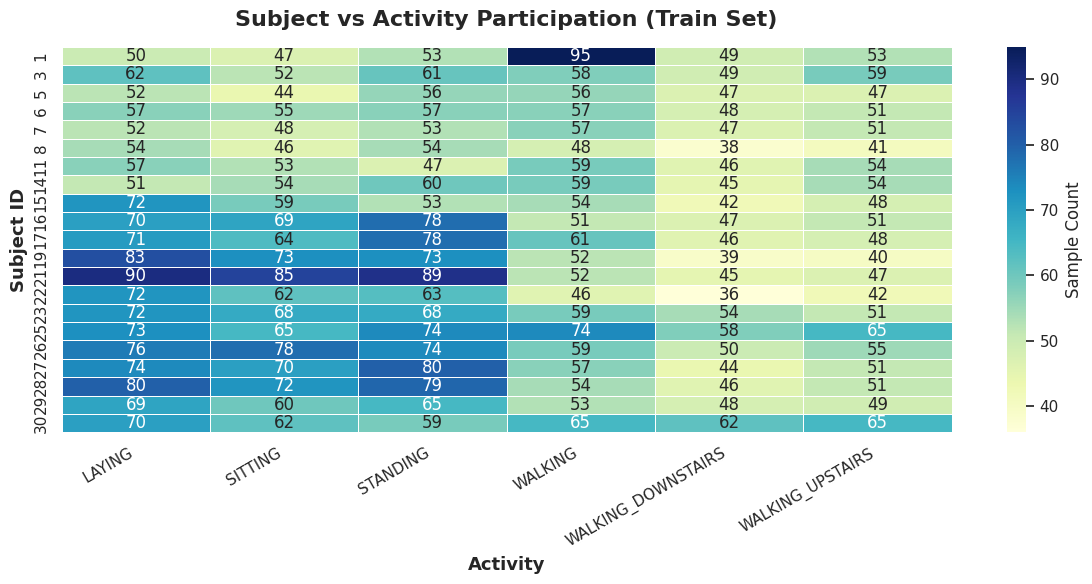

In [10]:
activity_map = dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))

if 'Activity' not in train_data.columns:
    train_data['Activity'] = train_data['activity_id'].map(activity_map)

pivot = train_data.pivot_table(
    index='subject_id',
    columns='Activity',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Sample Count'}
)

plt.title("Subject vs Activity Participation (Train Set)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Activity", fontsize=13, fontweight='bold')
plt.ylabel("Subject ID", fontsize=13, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()



### Pca projection

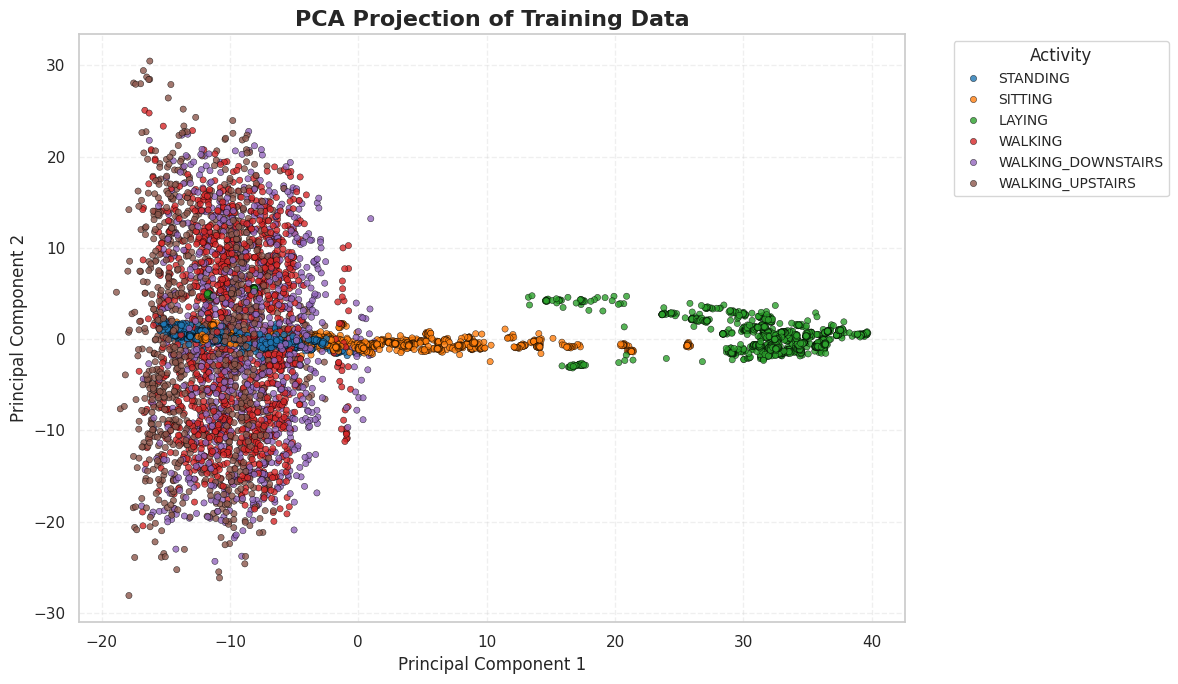

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data.drop(columns=['Activity']))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = train_data['Activity']

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='tab10',
    alpha=0.8,
    edgecolor='black',
    s=20
)

plt.title("PCA Projection of Training Data", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title="Activity")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Data Cleaning & PreProcessing

### Train - Val - Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = train_data.drop(columns=['Activity', 'subject_id' , 'activity_id'])
y = train_data['Activity']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 80% train, 20% validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print("Train shape:", X_train_split.shape)
print("Validation shape:", X_val_split.shape)


Train shape: (6616, 1152)
Validation shape: (736, 1152)


In [13]:
# Checking if duplicates exists
print("Missing values in X_train:", X_train_split.isna().sum().sum())
print("Missing values in X_val:", X_val_split.isna().sum().sum())
# Duplicates
print("Duplicates in X_train:", X_train_split.duplicated().sum())

# There is No Duplicates Value here.

Missing values in X_train: 0
Missing values in X_val: 0
Duplicates in X_train: 0


### Outlier Detection

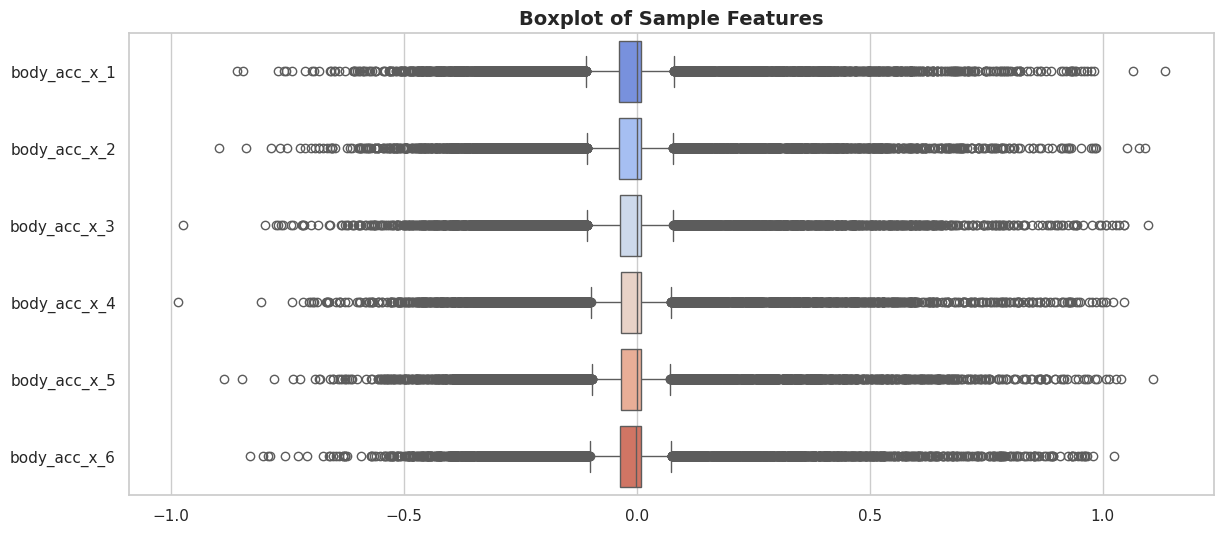

In [14]:
sample_features = X_train_split.columns[:6]
plt.figure(figsize=(14,6))
sns.boxplot(data=X_train_split[sample_features], orient='h', palette='coolwarm')
plt.title("Boxplot of Sample Features", fontsize=14, fontweight='bold')
plt.show()

# Clearly shows that there is no outliers in the dataset as such .
# Even though if we have outlier , we won't remove them as this is a HAR dataset , so sensor data might spike up and it's very natural .

### Normalisation

In [15]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled   = scaler.transform(X_val_split)

le = LabelEncoder()
le.fit(y)  # Fit on full label set for consistent mapping
y_train_enc = le.transform(y_train_split)
y_val_enc   = le.transform(y_val_split)

print("Label classes:", le.classes_)

joblib.dump(le, 'label_encoder.pkl')   # Saving the encoder for future usecase.
joblib.dump(scaler, 'scaler.pkl')

Label classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


['scaler.pkl']

# ML Model

### LSTM Model Class

In [116]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional = True
        )

        self.fc1 = nn.Linear(hidden_size * 2, 128)  # <-- fixed
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)      # <-- added
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
      out, _ = self.lstm(x)
      out = out[:, -1, :]
      out = self.fc1(out)
      out = self.relu(out)
      out = self.dropout(out)
      out = self.fc2(out)
      return out



In [117]:
timesteps = 128
features_per_timestep = X_train_scaled.shape[1] // timesteps

X_train_lstm = X_train_scaled.reshape(-1, timesteps, features_per_timestep)
X_val_lstm   = X_val_scaled.reshape(-1, timesteps, features_per_timestep)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_enc, dtype=torch.long)
X_val_tensor   = torch.tensor(X_val_lstm, dtype=torch.float32)
y_val_tensor   = torch.tensor(y_val_enc, dtype=torch.long)

# Dataloaders
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)

### Training Loop with MlFlow

In [118]:
import mlflow
import mlflow.pytorch
from tqdm import tqdm
import warnings, logging
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [129]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("mlflow").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.ERROR)

def train_lstm_with_mlflow(
    model,
    train_loader,
    val_loader,
    num_epochs=20,
    lr=0.001,
    experiment_name="HAR_LSTM",
    run_name="LSTM_Run"
):
    """
    Full LSTM training loop with MLflow logging, tqdm progress,
    automatic checkpoint saving, and dashboard-friendly artifacts.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=1e-4)

    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name):
        mlflow.log_params({
            "learning_rate": lr,
            "epochs": num_epochs,
            "hidden_size": model.hidden_size,
            "num_layers": model.num_layers,
            "device": str(device),
        })

        best_val_acc = 0.0
        train_losses, val_losses, train_accs, val_accs = [], [], [], []

        for epoch in range(num_epochs):
            model.train()
            running_loss, all_preds, all_labels = 0.0, [], []

            loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)
            for X_batch, y_batch in loop:


                noise_level = 0.01
                noise = noise_level * torch.randn_like(X_batch)
                X_batch = X_batch + noise

                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()

                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                preds = outputs.argmax(dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())
                loop.set_postfix(loss=loss.item())

            train_acc = accuracy_score(all_labels, all_preds)
            avg_train_loss = running_loss / len(train_loader)


            model.eval()
            val_loss, val_preds, val_labels = 0.0, [], []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    val_loss += loss.item()
                    preds = outputs.argmax(dim=1)
                    val_preds.extend(preds.cpu().numpy())
                    val_labels.extend(y_batch.cpu().numpy())

            val_acc = accuracy_score(val_labels, val_preds)
            avg_val_loss = val_loss / len(val_loader)

            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)
            train_accs.append(train_acc)
            val_accs.append(val_acc)

            mlflow.log_metrics({
                "train_loss": avg_train_loss,
                "val_loss": avg_val_loss,
                "train_acc": train_acc,
                "val_acc": val_acc
            }, step=epoch)

            tqdm.write(f"Epoch [{epoch+1}/{num_epochs}] | "
                       f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | "
                       f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), "best_model.pth")
                mlflow.log_artifact("best_model.pth")

        cm = confusion_matrix(val_labels, val_preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
        plt.title("Confusion Matrix (Validation Set)", fontsize=14)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close()

        model_cpu = model.to("cpu")
        example_input = np.random.randn(1, 128, model.input_size).astype(np.float32)
        mlflow.pytorch.log_model(model_cpu, name="model", input_example=example_input)
        print("\n Model training complete and logged to MLflow!")

        # Return final results
        return {
            "train_losses": train_losses,
            "val_losses": val_losses,
            "train_accs": train_accs,
            "val_accs": val_accs,
            "best_val_acc": best_val_acc
        }


In [130]:
from datetime import datetime

input_size = 9
hidden_size = 128
num_layers = 2
num_classes = len(le.classes_)
lr = 0.003
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M")
run_name = f"LSTM_h{hidden_size}_lr{lr}_{timestamp}"

model = LSTMModel(input_size, hidden_size, num_layers, num_classes)

results = train_lstm_with_mlflow(
    model,
    train_loader,
    val_loader,
    num_epochs=100,
    lr=lr,
    experiment_name="HAR_LSTM",
    run_name=run_name
)

Epoch [1/100] | Train Loss: 1.1400 | Val Loss: 0.7435 | Train Acc: 0.5871 | Val Acc: 0.8397


Epoch [2/100] | Train Loss: 0.7624 | Val Loss: 0.5736 | Train Acc: 0.8381 | Val Acc: 0.9226


Epoch [3/100] | Train Loss: 0.5771 | Val Loss: 0.5240 | Train Acc: 0.9282 | Val Acc: 0.9429


Epoch [4/100] | Train Loss: 0.5481 | Val Loss: 0.5303 | Train Acc: 0.9406 | Val Acc: 0.9484


Epoch [5/100] | Train Loss: 0.5452 | Val Loss: 0.5351 | Train Acc: 0.9435 | Val Acc: 0.9348


Epoch [6/100] | Train Loss: 0.5305 | Val Loss: 0.5206 | Train Acc: 0.9504 | Val Acc: 0.9524


Epoch [7/100] | Train Loss: 0.5327 | Val Loss: 0.5265 | Train Acc: 0.9482 | Val Acc: 0.9524


Epoch [8/100] | Train Loss: 0.5204 | Val Loss: 0.5212 | Train Acc: 0.9534 | Val Acc: 0.9470


Epoch [9/100] | Train Loss: 0.5138 | Val Loss: 0.5297 | Train Acc: 0.9550 | Val Acc: 0.9552


Epoch [10/100] | Train Loss: 0.5383 | Val Loss: 0.5408 | Train Acc: 0.9479 | Val Acc: 0.9470


Epoch [11/100] | Train Loss: 0.5225 | Val Loss: 0.5048 | Train Acc: 0.9521 | Val Acc: 0.9579


Epoch [12/100] | Train Loss: 0.5105 | Val Loss: 0.5060 | Train Acc: 0.9560 | Val Acc: 0.9565


Epoch [13/100] | Train Loss: 0.5153 | Val Loss: 0.5391 | Train Acc: 0.9541 | Val Acc: 0.9457


Epoch [14/100] | Train Loss: 0.5116 | Val Loss: 0.5213 | Train Acc: 0.9568 | Val Acc: 0.9443


Epoch [15/100] | Train Loss: 0.5152 | Val Loss: 0.5083 | Train Acc: 0.9547 | Val Acc: 0.9579


Epoch [16/100] | Train Loss: 0.5022 | Val Loss: 0.5089 | Train Acc: 0.9621 | Val Acc: 0.9592


Epoch [17/100] | Train Loss: 0.5164 | Val Loss: 0.4990 | Train Acc: 0.9553 | Val Acc: 0.9538


Epoch [18/100] | Train Loss: 0.4996 | Val Loss: 0.5012 | Train Acc: 0.9631 | Val Acc: 0.9633


Epoch [19/100] | Train Loss: 0.5057 | Val Loss: 0.5292 | Train Acc: 0.9589 | Val Acc: 0.9524


Epoch [20/100] | Train Loss: 0.5003 | Val Loss: 0.4891 | Train Acc: 0.9622 | Val Acc: 0.9688


Epoch [21/100] | Train Loss: 0.4963 | Val Loss: 0.5109 | Train Acc: 0.9634 | Val Acc: 0.9565


Epoch [22/100] | Train Loss: 0.5820 | Val Loss: 0.5129 | Train Acc: 0.9282 | Val Acc: 0.9606


Epoch [23/100] | Train Loss: 0.5117 | Val Loss: 0.4911 | Train Acc: 0.9621 | Val Acc: 0.9620


Epoch [24/100] | Train Loss: 0.5087 | Val Loss: 0.5126 | Train Acc: 0.9574 | Val Acc: 0.9538


Epoch [25/100] | Train Loss: 0.5016 | Val Loss: 0.5009 | Train Acc: 0.9606 | Val Acc: 0.9620


Epoch [26/100] | Train Loss: 0.4949 | Val Loss: 0.5110 | Train Acc: 0.9622 | Val Acc: 0.9511


Epoch [27/100] | Train Loss: 0.5169 | Val Loss: 0.5235 | Train Acc: 0.9557 | Val Acc: 0.9552


Epoch [28/100] | Train Loss: 0.5024 | Val Loss: 0.4896 | Train Acc: 0.9628 | Val Acc: 0.9647


Epoch [29/100] | Train Loss: 0.4947 | Val Loss: 0.5027 | Train Acc: 0.9622 | Val Acc: 0.9565


Epoch [30/100] | Train Loss: 0.4992 | Val Loss: 0.5130 | Train Acc: 0.9634 | Val Acc: 0.9457


Epoch [31/100] | Train Loss: 0.5079 | Val Loss: 0.4909 | Train Acc: 0.9583 | Val Acc: 0.9606


Epoch [32/100] | Train Loss: 0.4931 | Val Loss: 0.4981 | Train Acc: 0.9658 | Val Acc: 0.9688


Epoch [33/100] | Train Loss: 0.4948 | Val Loss: 0.4878 | Train Acc: 0.9640 | Val Acc: 0.9701


Epoch [34/100] | Train Loss: 0.4992 | Val Loss: 0.4994 | Train Acc: 0.9621 | Val Acc: 0.9606


Epoch [35/100] | Train Loss: 0.4900 | Val Loss: 0.4942 | Train Acc: 0.9634 | Val Acc: 0.9606


Epoch [36/100] | Train Loss: 0.4880 | Val Loss: 0.4772 | Train Acc: 0.9670 | Val Acc: 0.9688


Epoch [37/100] | Train Loss: 0.4907 | Val Loss: 0.4951 | Train Acc: 0.9633 | Val Acc: 0.9647


Epoch [38/100] | Train Loss: 0.5115 | Val Loss: 0.4987 | Train Acc: 0.9586 | Val Acc: 0.9620


Epoch [39/100] | Train Loss: 0.4870 | Val Loss: 0.4754 | Train Acc: 0.9680 | Val Acc: 0.9715


Epoch [40/100] | Train Loss: 0.4835 | Val Loss: 0.4904 | Train Acc: 0.9689 | Val Acc: 0.9688


Epoch [41/100] | Train Loss: 0.4909 | Val Loss: 0.4831 | Train Acc: 0.9642 | Val Acc: 0.9701


Epoch [42/100] | Train Loss: 0.4863 | Val Loss: 0.4924 | Train Acc: 0.9693 | Val Acc: 0.9647


Epoch [43/100] | Train Loss: 0.5068 | Val Loss: 0.4967 | Train Acc: 0.9595 | Val Acc: 0.9620


Epoch [44/100] | Train Loss: 0.5044 | Val Loss: 0.4970 | Train Acc: 0.9628 | Val Acc: 0.9592


Epoch [45/100] | Train Loss: 0.5008 | Val Loss: 0.5059 | Train Acc: 0.9619 | Val Acc: 0.9592


Epoch [46/100] | Train Loss: 0.4838 | Val Loss: 0.5050 | Train Acc: 0.9698 | Val Acc: 0.9688


Epoch [47/100] | Train Loss: 0.4984 | Val Loss: 0.5137 | Train Acc: 0.9648 | Val Acc: 0.9647


Epoch [48/100] | Train Loss: 0.4991 | Val Loss: 0.4831 | Train Acc: 0.9639 | Val Acc: 0.9688


Epoch [49/100] | Train Loss: 0.4896 | Val Loss: 0.4823 | Train Acc: 0.9674 | Val Acc: 0.9660


Epoch [50/100] | Train Loss: 0.4811 | Val Loss: 0.4906 | Train Acc: 0.9708 | Val Acc: 0.9647


Epoch [51/100] | Train Loss: 0.4927 | Val Loss: 0.5131 | Train Acc: 0.9657 | Val Acc: 0.9715


Epoch [52/100] | Train Loss: 0.4799 | Val Loss: 0.4794 | Train Acc: 0.9739 | Val Acc: 0.9728


Epoch [53/100] | Train Loss: 0.4777 | Val Loss: 0.4760 | Train Acc: 0.9743 | Val Acc: 0.9742


Epoch [54/100] | Train Loss: 0.5053 | Val Loss: 0.4808 | Train Acc: 0.9642 | Val Acc: 0.9688


Epoch [55/100] | Train Loss: 0.4891 | Val Loss: 0.4743 | Train Acc: 0.9678 | Val Acc: 0.9728


Epoch [56/100] | Train Loss: 0.4827 | Val Loss: 0.5126 | Train Acc: 0.9717 | Val Acc: 0.9592


Epoch [57/100] | Train Loss: 0.5111 | Val Loss: 0.5163 | Train Acc: 0.9661 | Val Acc: 0.9416


Epoch [58/100] | Train Loss: 0.4935 | Val Loss: 0.4832 | Train Acc: 0.9705 | Val Acc: 0.9674


Epoch [59/100] | Train Loss: 0.4747 | Val Loss: 0.4801 | Train Acc: 0.9752 | Val Acc: 0.9715


Epoch [60/100] | Train Loss: 0.4783 | Val Loss: 0.4825 | Train Acc: 0.9752 | Val Acc: 0.9674


Epoch [61/100] | Train Loss: 0.4738 | Val Loss: 0.4749 | Train Acc: 0.9772 | Val Acc: 0.9755


Epoch [62/100] | Train Loss: 0.4780 | Val Loss: 0.4818 | Train Acc: 0.9748 | Val Acc: 0.9728


Epoch [63/100] | Train Loss: 0.4793 | Val Loss: 0.4718 | Train Acc: 0.9720 | Val Acc: 0.9742


Epoch [64/100] | Train Loss: 0.4732 | Val Loss: 0.4761 | Train Acc: 0.9758 | Val Acc: 0.9742


Epoch [65/100] | Train Loss: 0.4858 | Val Loss: 0.4677 | Train Acc: 0.9728 | Val Acc: 0.9783


Epoch [66/100] | Train Loss: 0.4750 | Val Loss: 0.4741 | Train Acc: 0.9773 | Val Acc: 0.9755


Epoch [67/100] | Train Loss: 0.4800 | Val Loss: 0.4757 | Train Acc: 0.9729 | Val Acc: 0.9742


Epoch [68/100] | Train Loss: 0.4785 | Val Loss: 0.4748 | Train Acc: 0.9752 | Val Acc: 0.9823


Epoch [69/100] | Train Loss: 0.4733 | Val Loss: 0.4652 | Train Acc: 0.9779 | Val Acc: 0.9755


Epoch [70/100] | Train Loss: 0.4792 | Val Loss: 0.4641 | Train Acc: 0.9769 | Val Acc: 0.9796


Epoch [71/100] | Train Loss: 0.4691 | Val Loss: 0.4707 | Train Acc: 0.9788 | Val Acc: 0.9796


Epoch [72/100] | Train Loss: 0.4816 | Val Loss: 0.4892 | Train Acc: 0.9746 | Val Acc: 0.9755


Epoch [73/100] | Train Loss: 0.4820 | Val Loss: 0.4820 | Train Acc: 0.9752 | Val Acc: 0.9742


Epoch [74/100] | Train Loss: 0.4673 | Val Loss: 0.4711 | Train Acc: 0.9805 | Val Acc: 0.9742


Epoch [75/100] | Train Loss: 0.4774 | Val Loss: 0.4819 | Train Acc: 0.9761 | Val Acc: 0.9755


Epoch [76/100] | Train Loss: 0.4728 | Val Loss: 0.5119 | Train Acc: 0.9793 | Val Acc: 0.9538


Epoch [77/100] | Train Loss: 0.4685 | Val Loss: 0.4669 | Train Acc: 0.9808 | Val Acc: 0.9823


Epoch [78/100] | Train Loss: 0.4716 | Val Loss: 0.4677 | Train Acc: 0.9804 | Val Acc: 0.9742


Epoch [79/100] | Train Loss: 0.4785 | Val Loss: 0.4827 | Train Acc: 0.9766 | Val Acc: 0.9796


Epoch [80/100] | Train Loss: 0.4795 | Val Loss: 0.4637 | Train Acc: 0.9755 | Val Acc: 0.9810


Epoch [81/100] | Train Loss: 0.4804 | Val Loss: 0.4762 | Train Acc: 0.9757 | Val Acc: 0.9728


Epoch [82/100] | Train Loss: 0.4652 | Val Loss: 0.4665 | Train Acc: 0.9811 | Val Acc: 0.9769


Epoch [83/100] | Train Loss: 0.4675 | Val Loss: 0.4525 | Train Acc: 0.9814 | Val Acc: 0.9823


Epoch [84/100] | Train Loss: 0.4674 | Val Loss: 0.4799 | Train Acc: 0.9817 | Val Acc: 0.9769


Epoch [85/100] | Train Loss: 0.4817 | Val Loss: 0.4686 | Train Acc: 0.9766 | Val Acc: 0.9810


Epoch [86/100] | Train Loss: 0.4688 | Val Loss: 0.4692 | Train Acc: 0.9810 | Val Acc: 0.9783


Epoch [87/100] | Train Loss: 0.4610 | Val Loss: 0.4635 | Train Acc: 0.9844 | Val Acc: 0.9810


Epoch [88/100] | Train Loss: 0.4622 | Val Loss: 0.4686 | Train Acc: 0.9825 | Val Acc: 0.9810


Epoch [89/100] | Train Loss: 0.4656 | Val Loss: 0.4843 | Train Acc: 0.9843 | Val Acc: 0.9674


Epoch [90/100] | Train Loss: 0.4626 | Val Loss: 0.4704 | Train Acc: 0.9862 | Val Acc: 0.9823


Epoch [91/100] | Train Loss: 0.4727 | Val Loss: 0.4735 | Train Acc: 0.9808 | Val Acc: 0.9810


Epoch [92/100] | Train Loss: 0.4698 | Val Loss: 0.4740 | Train Acc: 0.9805 | Val Acc: 0.9742


Epoch [93/100] | Train Loss: 0.4685 | Val Loss: 0.4775 | Train Acc: 0.9817 | Val Acc: 0.9783


Epoch [94/100] | Train Loss: 0.4747 | Val Loss: 0.4774 | Train Acc: 0.9813 | Val Acc: 0.9810


Epoch [95/100] | Train Loss: 0.4649 | Val Loss: 0.4800 | Train Acc: 0.9858 | Val Acc: 0.9783


Epoch [96/100] | Train Loss: 0.4683 | Val Loss: 0.4832 | Train Acc: 0.9823 | Val Acc: 0.9742


Epoch [97/100] | Train Loss: 0.4622 | Val Loss: 0.4793 | Train Acc: 0.9828 | Val Acc: 0.9769


Epoch [98/100] | Train Loss: 0.4619 | Val Loss: 0.4736 | Train Acc: 0.9843 | Val Acc: 0.9783


Epoch [99/100] | Train Loss: 0.4556 | Val Loss: 0.4773 | Train Acc: 0.9879 | Val Acc: 0.9810


Epoch [100/100] | Train Loss: 0.4671 | Val Loss: 0.4662 | Train Acc: 0.9813 | Val Acc: 0.9823

 Model training complete and logged to MLflow!


### Training Loop Without MlFlow

In [47]:
def train_lstm(model, train_loader, val_loader, num_epochs=20, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct, total = 0.0, 0, 0

        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)
        for X_batch, y_batch in loop:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

            loop.set_postfix(loss=loss.item())

        train_acc = correct / total
        avg_train_loss = train_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                preds = outputs.argmax(dim=1)
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)
        val_acc = correct / total
        avg_val_loss = val_loss / len(val_loader)

        # Save metrics
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies


Epoch [1/100] | Train Loss: 1.3249, Val Loss: 1.3395, Train Acc: 0.4160, Val Acc: 0.4416


Epoch [2/100] | Train Loss: 0.8921, Val Loss: 0.7003, Train Acc: 0.6128, Val Acc: 0.6807


Epoch [3/100] | Train Loss: 0.7014, Val Loss: 0.6781, Train Acc: 0.6765, Val Acc: 0.6590


Epoch [4/100] | Train Loss: 0.6401, Val Loss: 0.5777, Train Acc: 0.7122, Val Acc: 0.7908


Epoch [5/100] | Train Loss: 0.6498, Val Loss: 0.5415, Train Acc: 0.7186, Val Acc: 0.7948


Epoch [6/100] | Train Loss: 0.5853, Val Loss: 0.6703, Train Acc: 0.7627, Val Acc: 0.7024


Epoch [7/100] | Train Loss: 0.5493, Val Loss: 0.4052, Train Acc: 0.7505, Val Acc: 0.8573


Epoch [8/100] | Train Loss: 0.4174, Val Loss: 0.4097, Train Acc: 0.8393, Val Acc: 0.8505


Epoch [9/100] | Train Loss: 0.3845, Val Loss: 0.3611, Train Acc: 0.8557, Val Acc: 0.8519


Epoch [10/100] | Train Loss: 0.3206, Val Loss: 0.3062, Train Acc: 0.8827, Val Acc: 0.8832


Epoch [11/100] | Train Loss: 0.2889, Val Loss: 0.2626, Train Acc: 0.8928, Val Acc: 0.9062


Epoch [12/100] | Train Loss: 0.2455, Val Loss: 0.2637, Train Acc: 0.9061, Val Acc: 0.9008


Epoch [13/100] | Train Loss: 0.2711, Val Loss: 0.2261, Train Acc: 0.8974, Val Acc: 0.9226


Epoch [14/100] | Train Loss: 0.2427, Val Loss: 0.2351, Train Acc: 0.9075, Val Acc: 0.9158


Epoch [15/100] | Train Loss: 0.2357, Val Loss: 0.2331, Train Acc: 0.9107, Val Acc: 0.9049


Epoch [16/100] | Train Loss: 0.2154, Val Loss: 0.1990, Train Acc: 0.9146, Val Acc: 0.9198


Epoch [17/100] | Train Loss: 0.1752, Val Loss: 0.1971, Train Acc: 0.9309, Val Acc: 0.9144


Epoch [18/100] | Train Loss: 0.4450, Val Loss: 0.3123, Train Acc: 0.8637, Val Acc: 0.8872


Epoch [19/100] | Train Loss: 0.2932, Val Loss: 0.2359, Train Acc: 0.8942, Val Acc: 0.9212


Epoch [20/100] | Train Loss: 0.2055, Val Loss: 0.1849, Train Acc: 0.9172, Val Acc: 0.9266


Epoch [21/100] | Train Loss: 0.1703, Val Loss: 0.1925, Train Acc: 0.9329, Val Acc: 0.9239


Epoch [22/100] | Train Loss: 0.2564, Val Loss: 0.1959, Train Acc: 0.8977, Val Acc: 0.9321


Epoch [23/100] | Train Loss: 0.1821, Val Loss: 0.1604, Train Acc: 0.9268, Val Acc: 0.9402


Epoch [24/100] | Train Loss: 0.1644, Val Loss: 0.1711, Train Acc: 0.9358, Val Acc: 0.9361


Epoch [25/100] | Train Loss: 0.1445, Val Loss: 0.1612, Train Acc: 0.9397, Val Acc: 0.9443


Epoch [26/100] | Train Loss: 0.1331, Val Loss: 0.1336, Train Acc: 0.9444, Val Acc: 0.9457


Epoch [27/100] | Train Loss: 0.1664, Val Loss: 0.1667, Train Acc: 0.9333, Val Acc: 0.9389


Epoch [28/100] | Train Loss: 0.1224, Val Loss: 0.1392, Train Acc: 0.9472, Val Acc: 0.9470


Epoch [29/100] | Train Loss: 0.1007, Val Loss: 0.1189, Train Acc: 0.9575, Val Acc: 0.9457


Epoch [30/100] | Train Loss: 0.1086, Val Loss: 0.1437, Train Acc: 0.9565, Val Acc: 0.9457


Epoch [31/100] | Train Loss: 0.1186, Val Loss: 0.1452, Train Acc: 0.9513, Val Acc: 0.9524


Epoch [32/100] | Train Loss: 0.1003, Val Loss: 0.2716, Train Acc: 0.9566, Val Acc: 0.9212


Epoch [33/100] | Train Loss: 0.1935, Val Loss: 0.1169, Train Acc: 0.9311, Val Acc: 0.9565


Epoch [34/100] | Train Loss: 0.1761, Val Loss: 0.1514, Train Acc: 0.9300, Val Acc: 0.9429


Epoch [35/100] | Train Loss: 0.1474, Val Loss: 0.1503, Train Acc: 0.9400, Val Acc: 0.9443


Epoch [36/100] | Train Loss: 0.1285, Val Loss: 0.1161, Train Acc: 0.9497, Val Acc: 0.9497


Epoch [37/100] | Train Loss: 0.1339, Val Loss: 0.1456, Train Acc: 0.9485, Val Acc: 0.9457


Epoch [38/100] | Train Loss: 0.1286, Val Loss: 0.1242, Train Acc: 0.9471, Val Acc: 0.9538


Epoch [39/100] | Train Loss: 0.1192, Val Loss: 0.1230, Train Acc: 0.9525, Val Acc: 0.9443


Epoch [40/100] | Train Loss: 0.1007, Val Loss: 0.0993, Train Acc: 0.9554, Val Acc: 0.9688


Epoch [41/100] | Train Loss: 0.0915, Val Loss: 0.1101, Train Acc: 0.9592, Val Acc: 0.9511


Epoch [42/100] | Train Loss: 0.0912, Val Loss: 0.0938, Train Acc: 0.9596, Val Acc: 0.9688


Epoch [43/100] | Train Loss: 0.0844, Val Loss: 0.1141, Train Acc: 0.9645, Val Acc: 0.9647


Epoch [44/100] | Train Loss: 0.0915, Val Loss: 0.1036, Train Acc: 0.9627, Val Acc: 0.9592


Epoch [45/100] | Train Loss: 0.0904, Val Loss: 0.1047, Train Acc: 0.9580, Val Acc: 0.9538


Epoch [46/100] | Train Loss: 0.0787, Val Loss: 0.1036, Train Acc: 0.9642, Val Acc: 0.9579


Epoch [47/100] | Train Loss: 0.0798, Val Loss: 0.1041, Train Acc: 0.9646, Val Acc: 0.9565


Epoch [48/100] | Train Loss: 0.0868, Val Loss: 0.1450, Train Acc: 0.9615, Val Acc: 0.9457


Epoch [49/100] | Train Loss: 0.0888, Val Loss: 0.1006, Train Acc: 0.9604, Val Acc: 0.9592


Epoch [50/100] | Train Loss: 0.0805, Val Loss: 0.1216, Train Acc: 0.9651, Val Acc: 0.9538


Epoch [51/100] | Train Loss: 0.0906, Val Loss: 0.1008, Train Acc: 0.9619, Val Acc: 0.9565


Epoch [52/100] | Train Loss: 0.0723, Val Loss: 0.0973, Train Acc: 0.9666, Val Acc: 0.9552


Epoch [53/100] | Train Loss: 0.0799, Val Loss: 0.0993, Train Acc: 0.9634, Val Acc: 0.9660


Epoch [54/100] | Train Loss: 0.0776, Val Loss: 0.1141, Train Acc: 0.9640, Val Acc: 0.9552


Epoch [55/100] | Train Loss: 0.0930, Val Loss: 0.0971, Train Acc: 0.9577, Val Acc: 0.9579


Epoch [56/100] | Train Loss: 0.1550, Val Loss: 0.1396, Train Acc: 0.9385, Val Acc: 0.9457


Epoch [57/100] | Train Loss: 0.0984, Val Loss: 0.0968, Train Acc: 0.9554, Val Acc: 0.9538


Epoch [58/100] | Train Loss: 0.0880, Val Loss: 0.0822, Train Acc: 0.9595, Val Acc: 0.9674


Epoch [59/100] | Train Loss: 0.0757, Val Loss: 0.0911, Train Acc: 0.9646, Val Acc: 0.9674


Epoch [60/100] | Train Loss: 0.0713, Val Loss: 0.0839, Train Acc: 0.9655, Val Acc: 0.9565


Epoch [61/100] | Train Loss: 0.0873, Val Loss: 0.0894, Train Acc: 0.9602, Val Acc: 0.9633


Epoch [62/100] | Train Loss: 0.0811, Val Loss: 0.0910, Train Acc: 0.9652, Val Acc: 0.9674


Epoch [63/100] | Train Loss: 0.0684, Val Loss: 0.1019, Train Acc: 0.9666, Val Acc: 0.9565


Epoch [64/100] | Train Loss: 0.0717, Val Loss: 0.0761, Train Acc: 0.9657, Val Acc: 0.9674


Epoch [65/100] | Train Loss: 0.0755, Val Loss: 0.0999, Train Acc: 0.9642, Val Acc: 0.9606


Epoch [66/100] | Train Loss: 0.0831, Val Loss: 0.1047, Train Acc: 0.9633, Val Acc: 0.9606


Epoch [67/100] | Train Loss: 0.0756, Val Loss: 0.0875, Train Acc: 0.9633, Val Acc: 0.9620


Epoch [68/100] | Train Loss: 0.0682, Val Loss: 0.0878, Train Acc: 0.9667, Val Acc: 0.9647


Epoch [69/100] | Train Loss: 0.0796, Val Loss: 0.0738, Train Acc: 0.9651, Val Acc: 0.9633


Epoch [70/100] | Train Loss: 0.0646, Val Loss: 0.0990, Train Acc: 0.9677, Val Acc: 0.9606


Epoch [71/100] | Train Loss: 0.0761, Val Loss: 0.0805, Train Acc: 0.9652, Val Acc: 0.9633


Epoch [72/100] | Train Loss: 0.0628, Val Loss: 0.0795, Train Acc: 0.9692, Val Acc: 0.9592


Epoch [73/100] | Train Loss: 0.0642, Val Loss: 0.0871, Train Acc: 0.9674, Val Acc: 0.9647


Epoch [74/100] | Train Loss: 0.0659, Val Loss: 0.0869, Train Acc: 0.9670, Val Acc: 0.9647


Epoch [75/100] | Train Loss: 0.0624, Val Loss: 0.0766, Train Acc: 0.9695, Val Acc: 0.9606


Epoch [76/100] | Train Loss: 0.0667, Val Loss: 0.0798, Train Acc: 0.9664, Val Acc: 0.9579


Epoch [77/100] | Train Loss: 0.0661, Val Loss: 0.0833, Train Acc: 0.9675, Val Acc: 0.9647


Epoch [78/100] | Train Loss: 0.0703, Val Loss: 0.1463, Train Acc: 0.9663, Val Acc: 0.9484


Epoch [79/100] | Train Loss: 0.0699, Val Loss: 0.0952, Train Acc: 0.9660, Val Acc: 0.9647


Epoch [80/100] | Train Loss: 0.0567, Val Loss: 0.0902, Train Acc: 0.9705, Val Acc: 0.9647


Epoch [81/100] | Train Loss: 0.0670, Val Loss: 0.0946, Train Acc: 0.9683, Val Acc: 0.9592


Epoch [82/100] | Train Loss: 0.0659, Val Loss: 0.1589, Train Acc: 0.9698, Val Acc: 0.9484


Epoch [83/100] | Train Loss: 0.0697, Val Loss: 0.0856, Train Acc: 0.9645, Val Acc: 0.9647


Epoch [84/100] | Train Loss: 0.0641, Val Loss: 0.0915, Train Acc: 0.9670, Val Acc: 0.9606


Epoch [85/100] | Train Loss: 0.0588, Val Loss: 0.1006, Train Acc: 0.9710, Val Acc: 0.9538


Epoch [86/100] | Train Loss: 0.0553, Val Loss: 0.0874, Train Acc: 0.9737, Val Acc: 0.9606


Epoch [87/100] | Train Loss: 0.0566, Val Loss: 0.0938, Train Acc: 0.9713, Val Acc: 0.9688


Epoch [88/100] | Train Loss: 0.0530, Val Loss: 0.0962, Train Acc: 0.9743, Val Acc: 0.9647


Epoch [89/100] | Train Loss: 0.0510, Val Loss: 0.0859, Train Acc: 0.9761, Val Acc: 0.9701


Epoch [90/100] | Train Loss: 0.0501, Val Loss: 0.0856, Train Acc: 0.9757, Val Acc: 0.9701


Epoch [91/100] | Train Loss: 0.0542, Val Loss: 0.0752, Train Acc: 0.9745, Val Acc: 0.9715


Epoch [92/100] | Train Loss: 0.0526, Val Loss: 0.0977, Train Acc: 0.9752, Val Acc: 0.9674


Epoch [93/100] | Train Loss: 0.0526, Val Loss: 0.0894, Train Acc: 0.9732, Val Acc: 0.9579


Epoch [94/100] | Train Loss: 0.0604, Val Loss: 0.1260, Train Acc: 0.9701, Val Acc: 0.9524


Epoch [95/100] | Train Loss: 0.0598, Val Loss: 0.0840, Train Acc: 0.9711, Val Acc: 0.9660


Epoch [96/100] | Train Loss: 0.0523, Val Loss: 0.0723, Train Acc: 0.9737, Val Acc: 0.9701


Epoch [97/100] | Train Loss: 0.0866, Val Loss: 0.0969, Train Acc: 0.9619, Val Acc: 0.9606


Epoch [98/100] | Train Loss: 0.0676, Val Loss: 0.0791, Train Acc: 0.9663, Val Acc: 0.9633


Epoch [99/100] | Train Loss: 0.0599, Val Loss: 0.0825, Train Acc: 0.9719, Val Acc: 0.9688


Epoch [100/100] | Train Loss: 0.0503, Val Loss: 0.0778, Train Acc: 0.9735, Val Acc: 0.9688


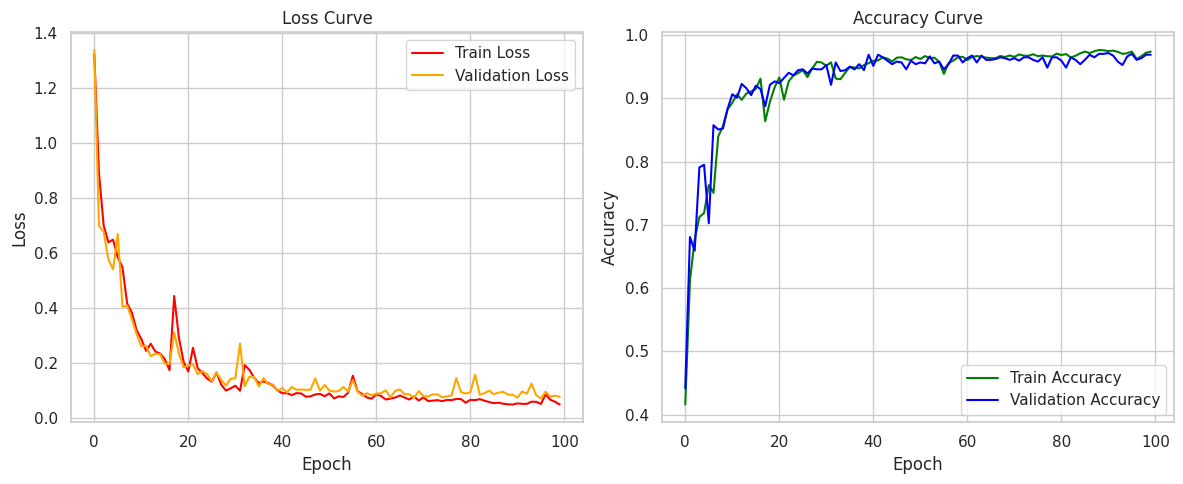

In [52]:
input_size = features_per_timestep
hidden_size = 64
num_layers = 2
num_classes = len(np.unique(y_train_enc))
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
train_losses, val_losses, train_accs, val_accs = train_lstm(model, train_loader, val_loader, num_epochs=100, lr=0.002)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='red')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Accuracy', color='green')
plt.plot(val_accs, label='Validation Accuracy', color='blue')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       141
           SITTING       0.89      0.91      0.90       129
          STANDING       0.92      0.89      0.90       137
           WALKING       0.66      0.96      0.78       123
WALKING_DOWNSTAIRS       0.73      0.45      0.56        99
  WALKING_UPSTAIRS       0.94      0.78      0.85       107

          accuracy                           0.85       736
         macro avg       0.86      0.83      0.83       736
      weighted avg       0.86      0.85      0.85       736



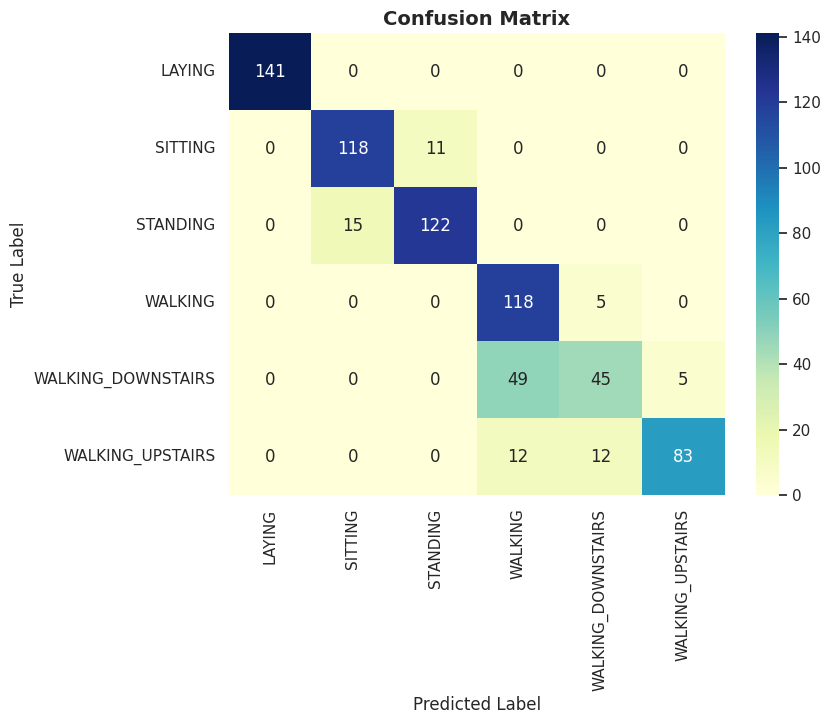

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Final Testing on the Test Data (Untouched)


Test Accuracy: 0.9152

                    precision    recall  f1-score   support

            LAYING       0.96      1.00      0.98       537
           SITTING       0.79      0.80      0.80       491
          STANDING       0.85      0.81      0.83       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       1.00      0.94      0.97       420
  WALKING_UPSTAIRS       0.95      0.95      0.95       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.91      0.92      0.91      2947



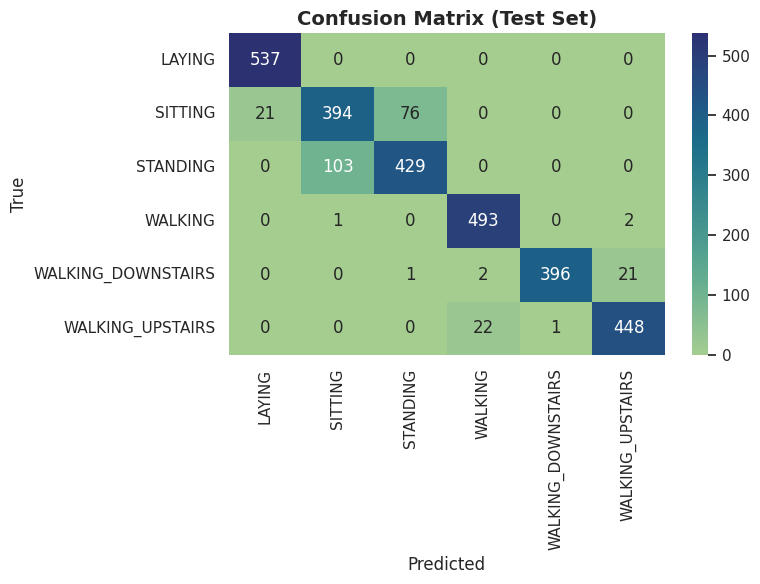

In [133]:
# ---------- Prepare Test Data ----------
test_data['Activity'] = test_data['activity_id'].map(
    dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))
)

X_test = test_data.drop(columns=['subject_id', 'activity_id', 'Activity'])
y_test = test_data['Activity']
y_test_enc = le.transform(y_test)

X_test_scaled = scaler.transform(pd.DataFrame(X_test, columns=X_train_split.columns))

timesteps = 128
features_per_timestep = X_test_scaled.shape[1] // timesteps
X_test_lstm = X_test_scaled.reshape(-1, timesteps, features_per_timestep)

X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_enc, dtype=torch.long)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

# ---------- Evaluate ----------
checkpoint_path = "/home/arpit/mlruns/314446008440956018/fa1f1ec8d1e643798fa055ed618f2ef7/artifacts/best_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.to(device)
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# ---------- Metrics ----------
test_acc = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {test_acc:.4f}\n")
print(classification_report(all_labels, all_preds, target_names=le.classes_))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Test Set)", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()